In [1]:
# import csv
import os
import numpy as np
import pandas as pd
dataset = 'PROTEINS'
x0 = 0.0
x1 = 1.0
y0 = 0.65
y1 = 0.85

In [2]:
method_list = ['HKS','WKS']
Path_list = ["./results/PROTEINS/"+method+"/" for method in method_list]
x_axis = [0.00,0.05,0.10,0.15,0.20,0.25,
              0.30,0.35,0.40,0.45,0.50,0.55,
              0.60,0.65,0.70,0.75,0.80,0.85,
              0.90,0.95,1.00]

# Get list of all files in a given directory sorted by name
list_of_files = [sorted( filter( lambda x: os.path.isfile(os.path.join(Path, x)),
                        os.listdir(Path) ) ) for Path in Path_list]
results_list = []
results_list.append([pd.read_csv(Path_list[0]+i) for i in list_of_files[0] ])
results_list.append([pd.read_csv(Path_list[1]+i) for i in list_of_files[1] ])

In [3]:
results_list[0][0]

,Unnamed: 0,w,C,gamma,accuracy
0,fold_id0,0.0,1.0,1.0,0.723214
1,fold_id1,0.0,1.0,1.0,0.758929
2,fold_id2,0.0,1.0,1.0,0.702703
3,fold_id3,0.0,1.0,1.0,0.756757
4,fold_id4,0.0,1.0,1.0,0.756757
5,fold_id5,0.0,1.0,1.0,0.747748
6,fold_id6,0.0,1.0,1.0,0.756757
7,fold_id7,0.0,1.0,1.0,0.756757
8,fold_id8,0.0,1.0,1.0,0.783784
9,fold_id9,0.0,1.0,1.0,0.774775


In [4]:
hks_means = np.array([np.mean(file["accuracy"]) for file in results_list[0]])
hks_stes = np.array([np.std(file["accuracy"]) for file in results_list[0]])/np.sqrt(10)
wks_means = np.array([np.mean(file["accuracy"]) for file in results_list[1]])
wks_stes = np.array([np.std(file["accuracy"]) for file in results_list[1]])/np.sqrt(10)

IndexError: list index out of range

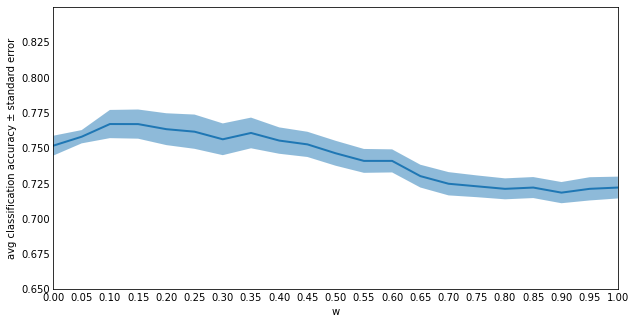

<Figure size 144x144 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
# plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

# plt.title("effect of w for WKS in PROTEINS") 
plt.xlabel("w") 
plt.ylabel("avg classification accuracy ± standard error") 

# ax.fill_between(x_axis, hks_means-hks_stes, hks_means+hks_stes, alpha=.5, linewidth=0)
ax.fill_between(x_axis, wks_means-wks_stes, wks_means+wks_stes, alpha=.5, linewidth=0)

# ax.plot(x_axis, hks_means, linewidth=2)
ax.plot(x_axis, wks_means, linewidth=2)
ax.grid(False)
ax.set(xlim=(x0, x1), xticks=np.arange(x0, x1+0.05, 0.05),
       ylim=(y0, y1), yticks=np.arange(y0, y1, 0.025))
plt.show()
plt.savefig('effect of w for WKS in PROTEINS.png', bbox_inches='tight', pad_inches=0)